In [63]:
!pip install pmdarima

In [109]:
# Libraries
import pandas as pd
import numpy as np
import pmdarima as pm
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GDPC1   308 non-null    float64
dtypes: float64(1)
memory usage: 2.5 KB


<Axes: >

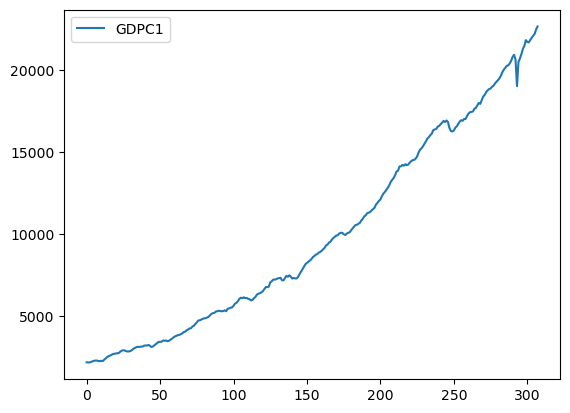

In [90]:
# Reading data
df = pd.read_csv(r"C:\Users\kesha\Downloads\GDPC1.csv")

df.info()
df.plot()

<Axes: >

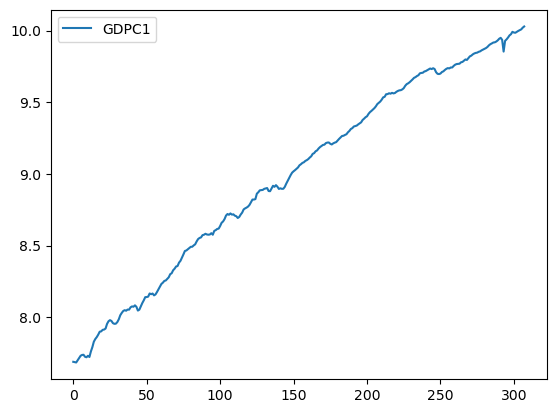

In [91]:
# Taking Log of GDP to reduce variation
df = np.log(df)

df.plot()

In [92]:
# Creating training and testing Data (last 30 observations are in testing data) 
msk = (df.index < len(df)-30)
df_train = df[msk].copy()
df_test = df[~msk].copy()

p-value: 0.261710169275316


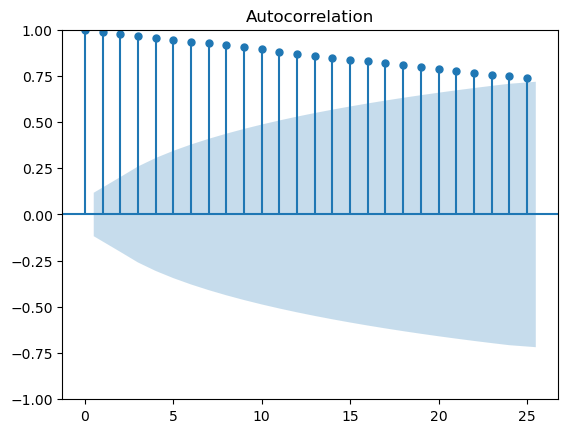

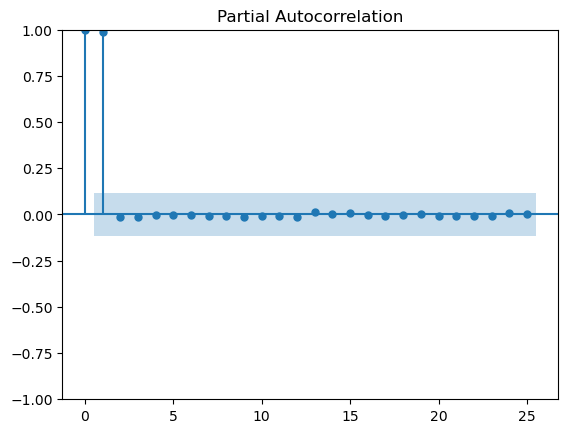

In [93]:
# Checking Stationarity
acf = plot_acf(df_train)
pacf = plot_pacf(df_train)
adf_test = adfuller(df_train)
print(f'p-value: {adf_test[1]}')

<Axes: >

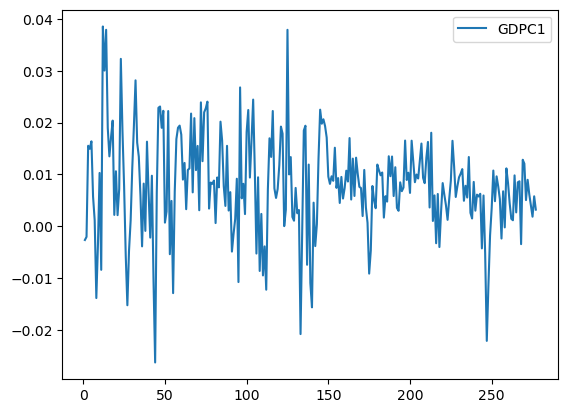

In [94]:
# Differencing
df_train_diff = df_train.diff().dropna()
df_train_diff.plot()

p-value: 3.8266798441467405e-13


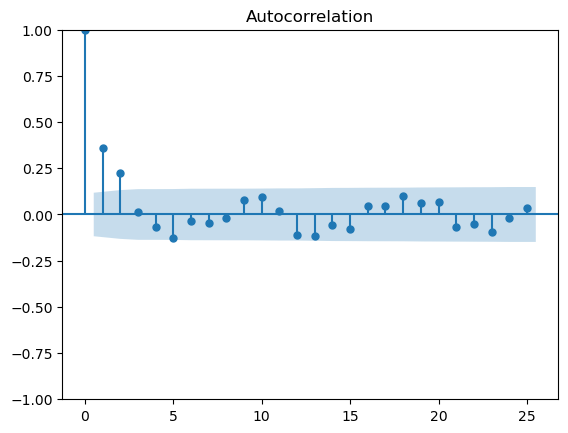

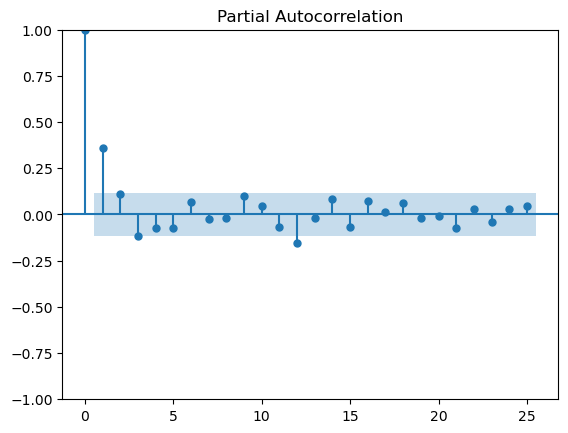

In [95]:
# Differencing to achieve stationarity
acf_diff = plot_acf(df_train_diff)
pacf_diff = plot_pacf(df_train_diff)
adf_test = adfuller(df_train_diff)
print(f'p-value: {adf_test[1]}')

In [100]:
# Fitting the ARIMA model
auto_arima = pm.auto_arima(df_train)
print(auto_arima)

model = ARIMA(df_train, order=(0,1,3))
model_fit = model.fit()

 ARIMA(0,1,3)(0,0,0)[0] intercept


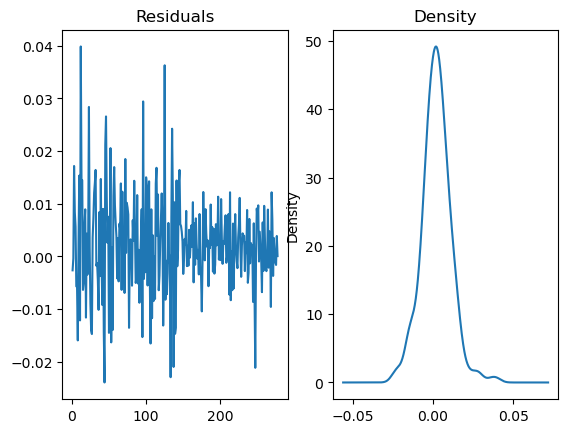

In [101]:
# Making time series predictions
residuals = model_fit.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(title='Density', kind='kde', ax=ax[1])
plt.show()

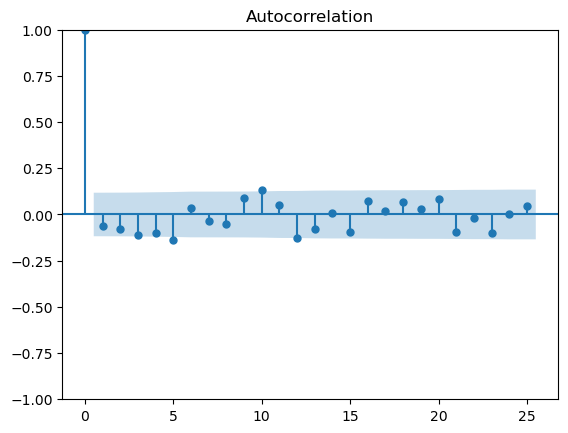

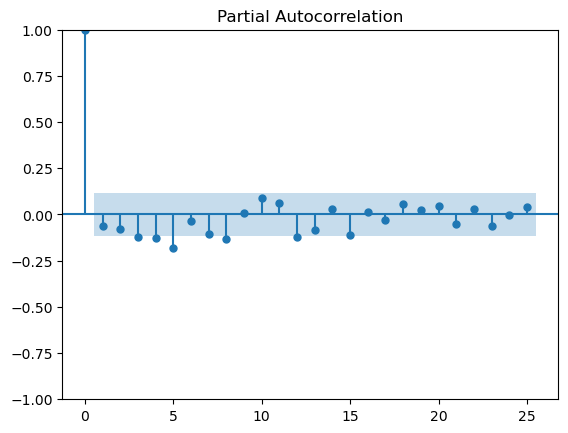

In [102]:
acf_res = plot_acf(residuals)

pacf_res = plot_pacf(residuals)

<Axes: >

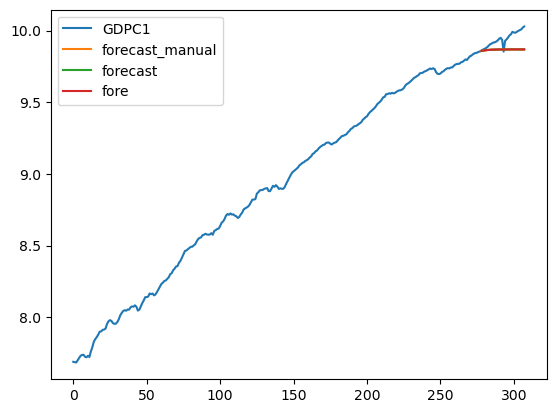

In [108]:
forecast_test = model_fit.forecast(len(df_test))

df['forecast'] = [None]*len(df_train) + list(forecast_test)

df.plot()

In [111]:
# Evaluate model predictions
mae = mean_absolute_error(df_test, forecast_test)
mape = mean_absolute_percentage_error(df_test, forecast_test)
rmse = np.sqrt(mean_squared_error(df_test, forecast_test))

print(f'mae: {mae}')
print(f'mape: {mape}')
print(f'rmse: {rmse}')

mae: 0.07477400442635448
mape: 0.007498836285126766
rmse: 0.08779704870762237
